# GALAH DR3 Tutorial 2: DR3 Value Added Catalogs

#### Author(s):
Sven Buder (SB, sven.buder@anu.edu.au)

In [1]:
# Preamble

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

# High-Resolution for Apple
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
import pandas
from astropy.table import Table, join

# Matplotlib packages
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

In [2]:
# First import the main table and some of the Value-Added-Catalogs
dr3_main_star = Table.read('../catalogs/GALAH_DR3_main_allstar_v1.fits')
dr3_vac_dyn = Table.read('../catalogs/GALAH_DR3_VAC_dynamics_v1.fits')
dr3_vac_ages = Table.read('../catalogs/GALAH_DR3_VAC_ages_v1.fits')

# We can easily merge the catalogs via "join" via the unique identifier 'sobject_id'
dr3_main_star_ages = join(dr3_main_star, dr3_vac_ages, keys='sobject_id', metadata_conflicts='silent')

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


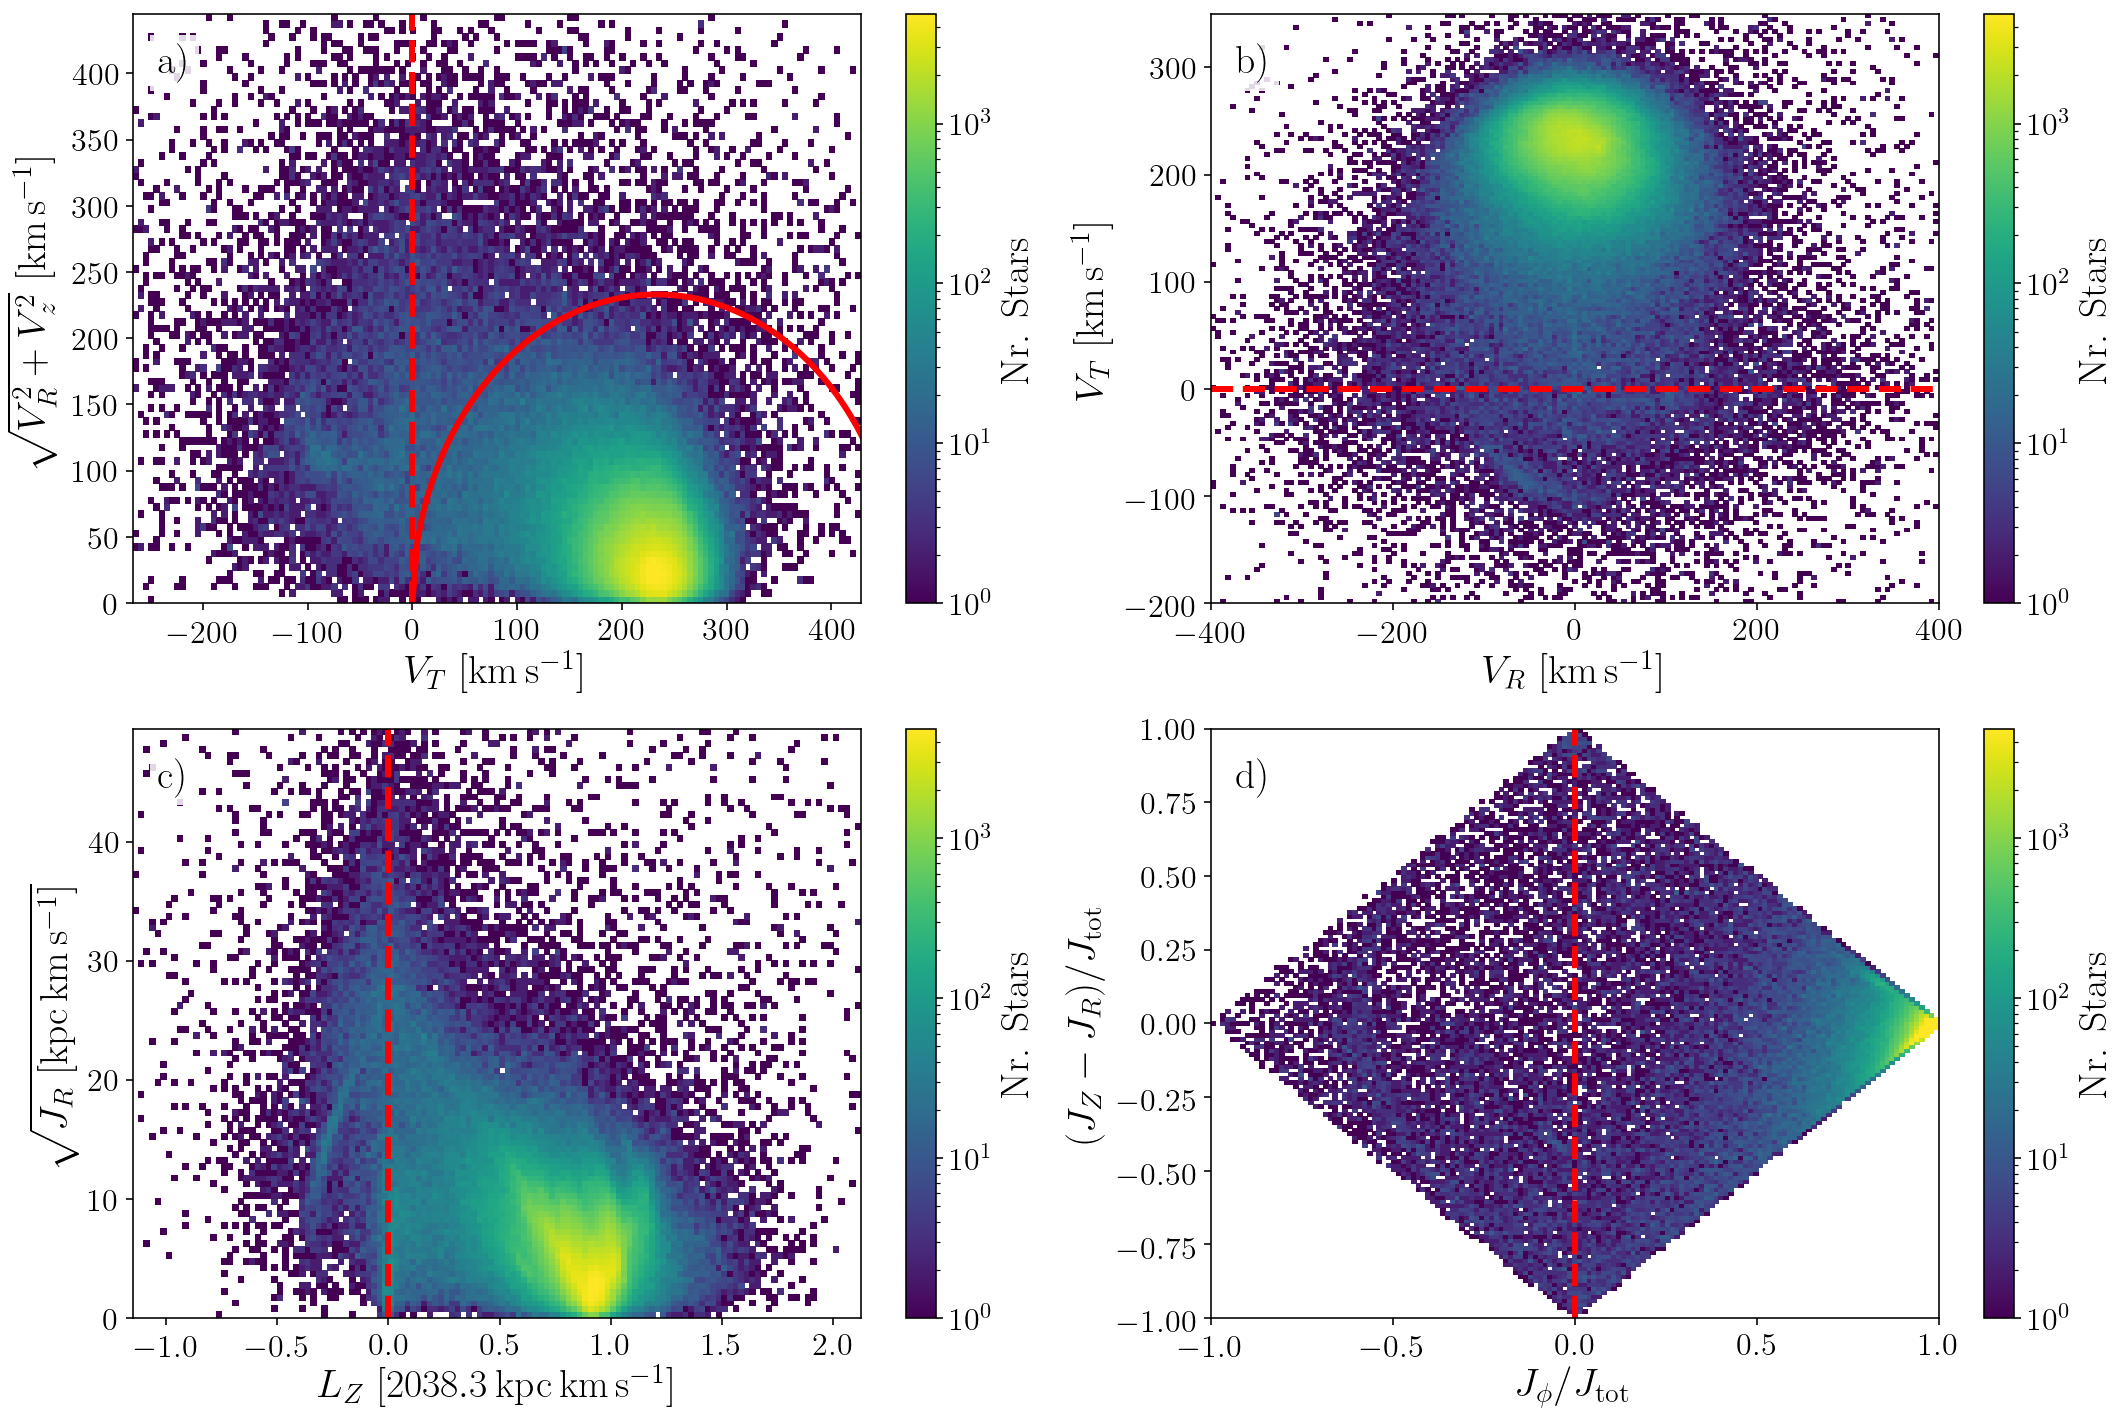

In [3]:
def plot_dynamics_overview():
    """
    This function plots the overview of GALAH+ DR3 stellar kinematics and dynamics
    """

    # First create a figure "f", with an array 2x2 grid of subplots "gs"
    f, gs = plt.subplots(2, 2, figsize=(15,10))

    # For the plotting, we can define keyword arguments, that the matplotlib
    kwargs_hist2d = dict(
        cmin=1,
        norm=LogNorm(),
        rasterized=True
        )

    # You can iterate over the array entries, or just refer to them individually
    ax1 = gs[0,0]
    ax2 = gs[1,0]
    ax3 = gs[0,1]
    ax4 = gs[1,1]

    good_dynamics = np.isfinite(dr3_vac_dyn['V_UVW'])

    p1, x1, y1, s1 = ax1.hist2d(
        dr3_vac_dyn['vT_Rzphi'][good_dynamics],
        np.sqrt(dr3_vac_dyn['vR_Rzphi'][good_dynamics]**2. + dr3_vac_dyn['vz_Rzphi'][good_dynamics]**2.),
        bins = (
            np.arange(233.1-500,233.1+200,5),
            np.arange(0,450,5)
        ),
        **kwargs_hist2d
        )
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')

    p2, x2, y2, s2 = ax2.hist2d(
        dr3_vac_dyn['L_Z'][good_dynamics]/(2038.3),
        np.sqrt(dr3_vac_dyn['J_R'][good_dynamics]),
        bins = (
            np.arange(-1.15,2.15,0.025),
            np.arange(0,50,0.5)
        ),
        **kwargs_hist2d
        )
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Stars')

    p3, x3, y3, s3 = ax3.hist2d(
        dr3_vac_dyn['vR_Rzphi'][good_dynamics],
        dr3_vac_dyn['vT_Rzphi'][good_dynamics],
        bins = (
            np.linspace(-400,400,150),
            np.linspace(-200,350,150)
        ),
        **kwargs_hist2d
        )
    c3 = plt.colorbar(s3, ax=ax3)
    c3.set_label('Nr. Stars')

    p4, x4, y4, s4 = ax4.hist2d(
        dr3_vac_dyn['L_Z'][good_dynamics]/(np.abs(dr3_vac_dyn['J_R'][good_dynamics])+np.abs(dr3_vac_dyn['L_Z'][good_dynamics])+np.abs(dr3_vac_dyn['J_Z'][good_dynamics])),
        (dr3_vac_dyn['J_Z'][good_dynamics]-dr3_vac_dyn['J_R'][good_dynamics])/(np.abs(dr3_vac_dyn['J_R'][good_dynamics])+np.abs(dr3_vac_dyn['L_Z'][good_dynamics])+np.abs(dr3_vac_dyn['J_Z'][good_dynamics])),
        bins = (
            np.linspace(-1,1,150),
            np.linspace(-1,1,150)
        ),
        **kwargs_hist2d
        )
    c4 = plt.colorbar(s4, ax=ax4)
    c4.set_label('Nr. Stars')

    ax1.set_xlabel(r'$V_T~\mathrm{[km\,s^{-1}]}$')
    ax1.set_ylabel(r'$\sqrt{V_R^2 + V_z^2}~\mathrm{[km\,s^{-1}]}$')
    ax2.set_xlabel(r'$L_Z~\mathrm{[2038.3\,kpc\,km\,s^{-1}]}$')
    ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')
    ax3.set_xlabel(r'$V_R~\mathrm{[km\,s^{-1}]}$')
    ax3.set_ylabel(r'$V_T~\mathrm{[km\,s^{-1}]}$')
    ax4.set_xlabel(r'$J_\phi/J_\text{tot}$')
    ax4.set_ylabel(r'$(J_Z-J_R)/J_\text{tot}$')

    ax1.axvline(0,c='r',ls='dashed',lw=3,label='$V_T = 0\,\mathrm{km\,s^{-1}}$')
    ax1.plot(np.linspace(0,2*233.1,100),np.sqrt(233.1**2-np.linspace(-233.1,233.1,100)**2),lw=3,c='r',label='$v_\mathrm{tot} = 233.1\,\mathrm{km\,s^{-1}}$')
    ax2.axvline(0,c='r',ls='dashed',lw=3,label='$L_Z = 0\,\mathrm{kpc\,km\,s^{-1}}$')
    ax3.axhline(0,c='r',ls='dashed',lw=3,label='$L_Z = 0\,\mathrm{kpc\,km\,s^{-1}}$')
    ax4.axvline(0,c='r',ls='dashed',lw=3,label='$L_Z = 0\,\mathrm{kpc\,km\,s^{-1}}$')

    props = dict(facecolor='w', edgecolor='None', alpha=0.85)   
    ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes,bbox=props)
    ax2.text(0.035,0.9,'c)',fontsize=20, transform=ax2.transAxes,bbox=props)
    ax3.text(0.035,0.9,'b)',fontsize=20, transform=ax3.transAxes,bbox=props)
    ax4.text(0.035,0.9,'d)',fontsize=20, transform=ax4.transAxes,bbox=props)

    plt.tight_layout()
    plt.show()
    plt.close()
    
plot_dynamics_overview()

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


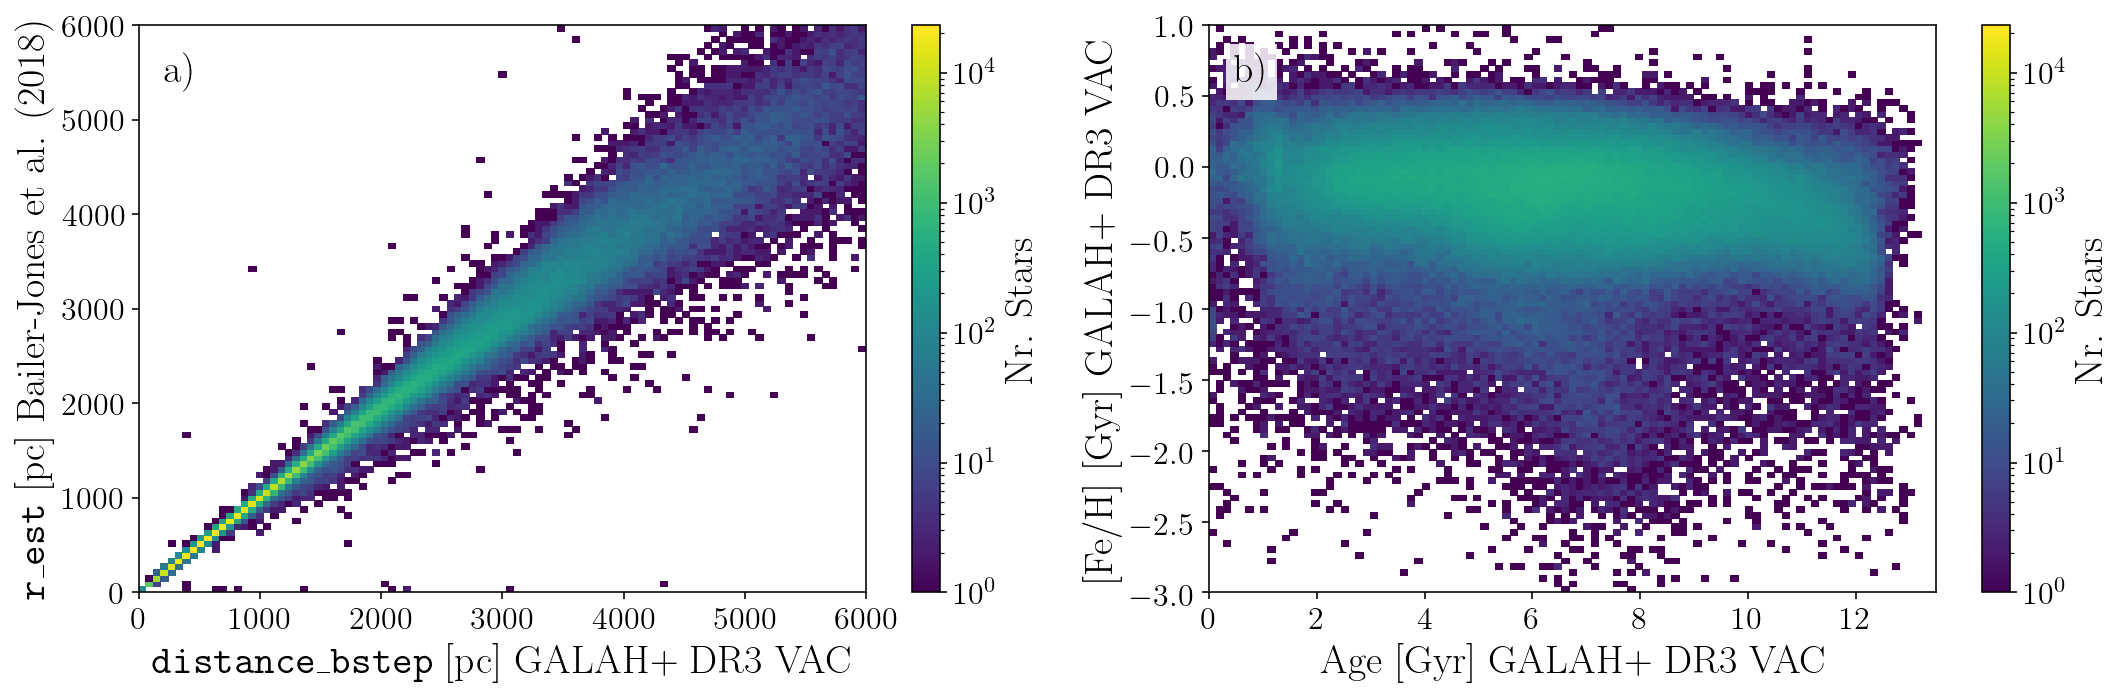

In [4]:
def plot_ages_overview():
    """
    This function plots some combinations from the Value-Added-Catalog of Ages
    """

    # First create a figure "f", with an array 2x2 grid of subplots "gs"
    f, gs = plt.subplots(1, 2, figsize=(15,5))

    # For the plotting, we can define keyword arguments, that the matplotlib
    kwargs_hist2d = dict(
        cmin=1,
        norm=LogNorm(),
        rasterized=True
        )

    # You can iterate over the array entries, or just refer to them individually
    ax1 = gs[0]
    ax2 = gs[1]

    good_entries = (
        np.isfinite(dr3_main_star_ages['distance_bstep']) &
        np.isfinite(dr3_main_star_ages['age_bstep']) & 
        (dr3_main_star_ages['flag_sp'] == 0) & 
        (dr3_main_star_ages['flag_fe_h'] == 0)
    )

    p1, x1, y1, s1 = ax1.hist2d(
        dr3_main_star_ages['distance_bstep'][good_entries]*1000,
        dr3_main_star_ages['r_est'][good_entries],
        bins = (
            np.linspace(0,6000,100),
            np.linspace(0,6000,100)
        ),
        **kwargs_hist2d
        )
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')

    p2, x2, y2, s2 = ax2.hist2d(
        dr3_main_star_ages['age_bstep'][good_entries],
        dr3_main_star_ages['fe_h'][good_entries],
        bins = (
            np.linspace(0,13.5,100),
            np.linspace(-3,1,100)
        ),
        **kwargs_hist2d
        )
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Stars')

    ax1.set_xlabel(r'\texttt{distance\_bstep} [pc] GALAH+ DR3 VAC')
    ax1.set_ylabel(r'\texttt{r\_est} [pc] Bailer-Jones et al. (2018)')
    ax2.set_xlabel(r'Age [Gyr]  GALAH+ DR3 VAC')
    ax2.set_ylabel(r'[Fe/H] [Gyr]  GALAH+ DR3 VAC')

    props = dict(facecolor='w', edgecolor='None', alpha=0.85)   
    ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes,bbox=props)
    ax2.text(0.035,0.9,'b)',fontsize=20, transform=ax2.transAxes,bbox=props)

    plt.tight_layout()
    plt.show()
    plt.close()
    
plot_ages_overview()